In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import sklearn
import os

2024-08-21 16:15:31.411898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 16:15:31.412043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 16:15:31.549968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Function to load images and resize it to 224x224px

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(os.path.join(path, file))))
        labels.append((label))
        
    return images, labels

In [3]:
#Loading Training Data

x_train = []
y_train = []


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/CaS', 0) 
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/CoS', 1)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/Gum', 2)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/MC', 3)
    
x_train += images
y_train += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OC', 4)
    
x_train += images
y_train += labels


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OLP', 5)
    
x_train += images
y_train += labels


images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Training/OT', 6)
    
x_train += images
y_train += labels

In [4]:
print(np.array(x_train).shape)
print(np.array(y_train).shape)

(3087, 256, 256, 3)
(3087,)


In [5]:
#Loading Validation Data

x_val = []
y_val = []

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/CaS', 0)

x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/CoS', 1)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/Gum', 2)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/MC', 3)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OC', 4)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OLP', 5)
    
x_val += images
y_val += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Validation/OT', 6)
    
x_val += images
y_val += labels




In [6]:
print(np.array(x_val).shape)
print(np.array(y_val).shape)

(1028, 256, 256, 3)
(1028,)


In [7]:
#Loading Testing Data

x_test = []
y_test = []

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/CaS', 0)

x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/CoS', 1)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/Gum', 2)
    
x_test += images
y_test += labels 

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/MC', 3)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OC', 4)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OLP', 5)
    
x_test += images
y_test += labels

images, labels = load_images_from_path('/kaggle/input/teeth-dataset/Teeth_Dataset/Testing/OT', 6)
    
x_test += images
y_test += labels


In [8]:
print(np.array(x_test).shape)
print(np.array(y_test).shape)

(1028, 256, 256, 3)
(1028,)


In [9]:
#Converting to numpy array

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

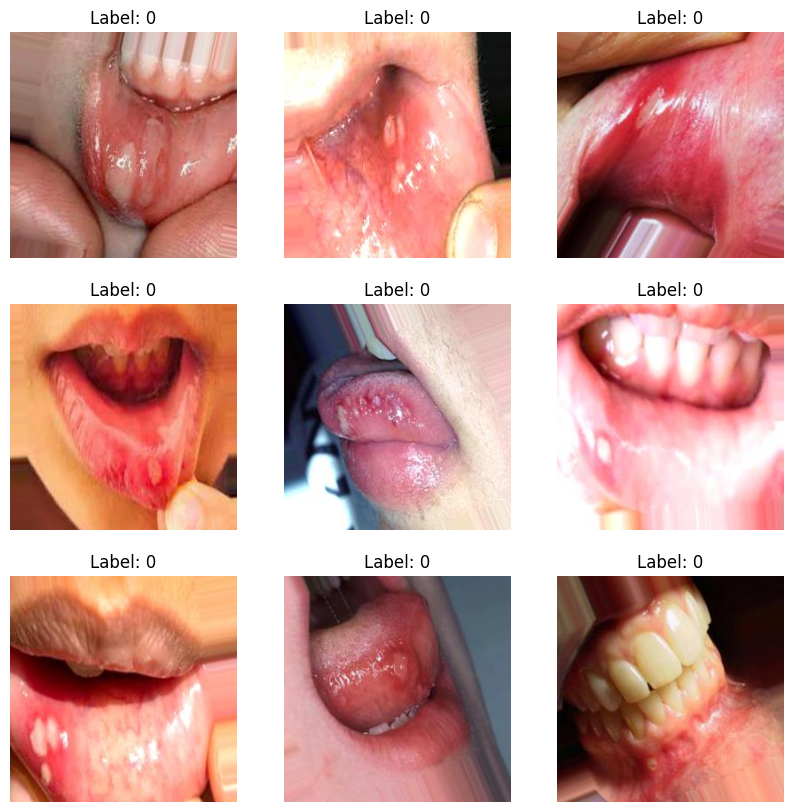

In [10]:
num_images = 9

# Create a figure with 3x3 subplots
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype('uint8'))  # Convert image to uint8 to display correctly
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')  # Hide axes

plt.show()

In [11]:
print("Data type of x_train:", x_train.dtype)
print("Data type of y_train:", y_train.dtype)

print("Data type of x_val:", x_val.dtype)
print("Data type of y_val:", y_val.dtype)

print("Data type of x_test:", x_test.dtype)
print("Data type of y_test:", y_test.dtype)

Data type of x_train: float32
Data type of y_train: int64
Data type of x_val: float32
Data type of y_val: int64
Data type of x_test: float32
Data type of y_test: int64


In [12]:
#Normalization

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [13]:
shuffle_indices = np.random.permutation(len(x_train))
x_train = x_train[shuffle_indices]
y_train = y_train[shuffle_indices]

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [15]:
from tensorflow.keras.layers import Input
input_layer = [256,256,3]

In [16]:
#Define Early Stopping Callback

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping callback
earlystop_callback = EarlyStopping(
    monitor='val_loss', patience=10,verbose=1 ,restore_best_weights=True
)



In [17]:
Teeth_Model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_layer),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
   
    
    tf.keras.layers.Dense(7, activation='softmax')
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
Teeth_Model_3.compile(optimizer='sgd',  
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [19]:
history = Teeth_Model_3.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[earlystop_callback])

Epoch 1/100


2024-08-21 16:16:20.906171: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.31777, expected 2.61172
2024-08-21 16:16:20.906234: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 5.10329, expected 4.39724
2024-08-21 16:16:20.906245: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 4.80913, expected 4.10308
2024-08-21 16:16:20.906254: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65544: 5.33366, expected 4.62762
2024-08-21 16:16:20.906263: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65545: 5.00267, expected 4.29663
2024-08-21 16:16:20.906272: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65546: 4.93559, expected 4.22954
2024-08-21 16:16:20.906281: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65547: 5.39283, expected 4.68678
2024-08-21 16:16:20.906290:

 2/97 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.1484 - loss: 1.9554  

I0000 00:00:1724256997.438430      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1639 - loss: 1.9466

2024-08-21 16:16:46.436878: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.43987, expected 2.00293
2024-08-21 16:16:46.436954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 3.08335, expected 2.64642
2024-08-21 16:16:46.436965: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 179: 3.04435, expected 2.60742
2024-08-21 16:16:46.436981: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2303: 3.03867, expected 2.60173
2024-08-21 16:16:46.436994: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3584: 3.31627, expected 2.87933
2024-08-21 16:16:46.437007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4607: 2.83112, expected 2.39418
2024-08-21 16:16:46.437016: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5119: 3.27289, expected 2.83596
2024-08-21 16:16:46.437027: E external/l

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.1640 - loss: 1.9465

2024-08-21 16:16:59.765072: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.24577, expected 2.80959
2024-08-21 16:16:59.765139: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 179: 3.17396, expected 2.73778
2024-08-21 16:16:59.765603: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.15611, expected 2.41005
2024-08-21 16:16:59.765640: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 3.84262, expected 3.09657
2024-08-21 16:16:59.765655: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 4.59187, expected 3.84581
2024-08-21 16:16:59.765668: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65539: 5.43123, expected 4.68518
2024-08-21 16:16:59.765681: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65540: 5.1009, expected 4.35484
2024-08-21 16:16:59.765696: E exte

97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 253ms/step - accuracy: 0.1641 - loss: 1.9464 - val_accuracy: 0.1556 - val_loss: 1.9237
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.1784 - loss: 1.9271 - val_accuracy: 0.2519 - val_loss: 1.9023
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.1996 - loss: 1.9000 - val_accuracy: 0.2267 - val_loss: 1.8782
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.2519 - loss: 1.8648 - val_accuracy: 0.2267 - val_loss: 1.8528
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.2806 - loss: 1.8187 - val_accuracy: 0.2821 - val_loss: 1.8084
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.2793 - loss: 1.7914 - val_accuracy: 0.3123 - val_loss: 1.7334
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.3131 - loss: 1.7384 - val_accuracy: 0.3560 - val_loss: 1.6913
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3315 - loss: 1.7071 - val_accuracy: 0.2909 - va

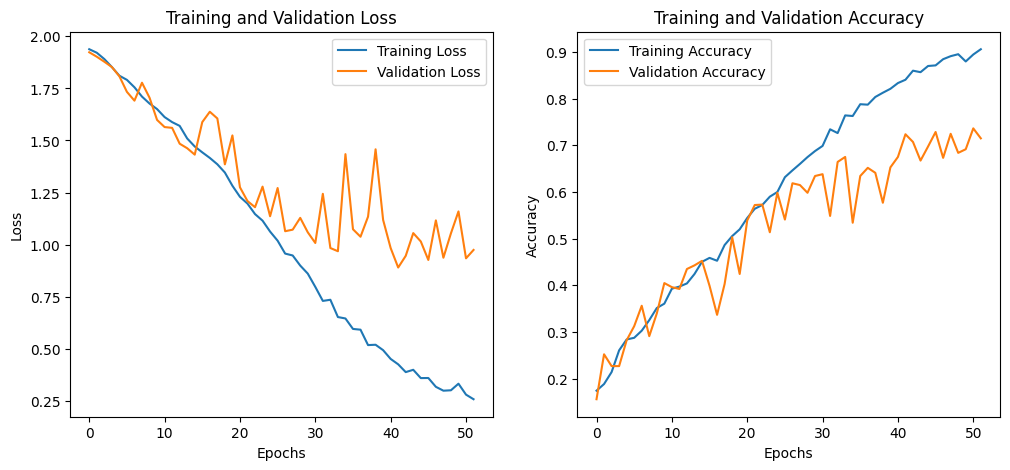

In [20]:
loss_acc_metrics_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_acc_metrics_df['loss'], label='Training Loss')
plt.plot(loss_acc_metrics_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loss_acc_metrics_df['accuracy'], label='Training Accuracy')
plt.plot(loss_acc_metrics_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [21]:
#Evaluating the model on test data

test_loss,test_acc = Teeth_Model_3.evaluate(x_test, y_test)

print("Test Loss: ", test_loss*100)
print("Test Accuracy: ", test_acc*100)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7634 - loss: 0.7462
Test Loss:  86.39182448387146
Test Accuracy:  72.85992503166199
